In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import statsmodels as sm   # contains good statistical tools for modeling

from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning

from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models

from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression

from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

import warnings

warnings.filterwarnings('ignore')


In [3]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin'] 
df = pd.read_csv(r'C:\Users\AJAO SEYI\Desktop\ML\auto-mpg.data', names =cols, na_values = "?", comment = '\t', sep= " ", skipinitialspace=True)

In [6]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
df.isnull().sum() #checking for null values

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64

C:\Users\AJAO SEYI\.conda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Horsepower'>

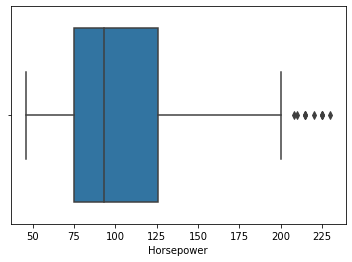

In [12]:
sns.boxplot(df['Horsepower'])

In [4]:
#replacing null values with the mean
mean = df['Horsepower'].mean()
df['Horsepower'] = df['Horsepower'].fillna(mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


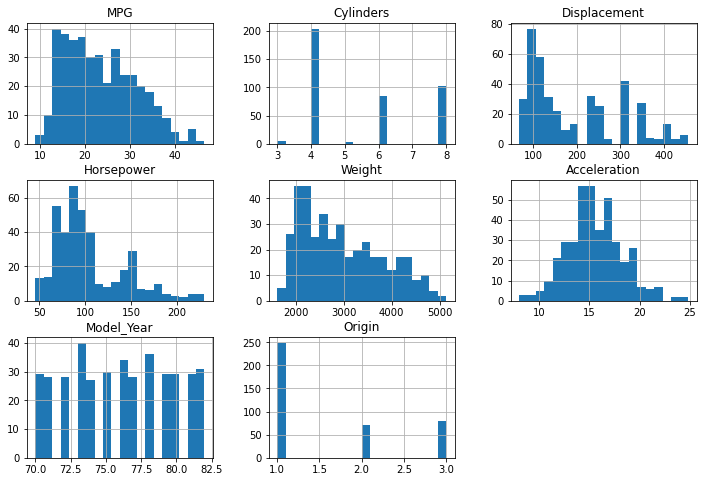

In [6]:
# let's visualize the distribution of the features of the cars
df.hist(figsize=(12,8),bins=20)
plt.show()

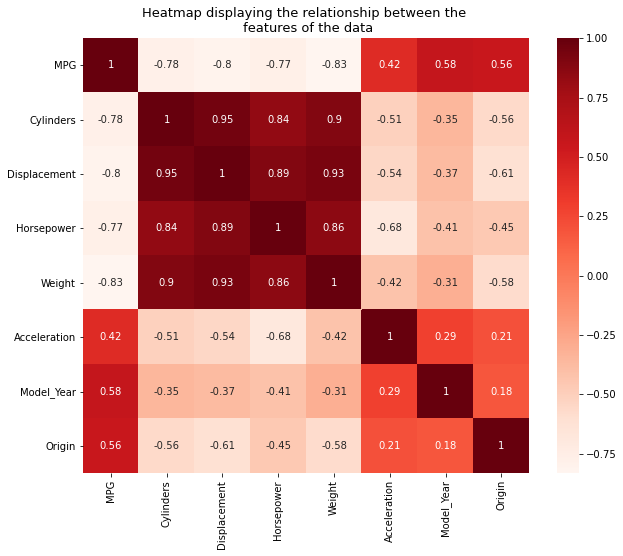

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the \n features of the data',
         fontsize=13)
plt.show()

In [7]:
#checking for collinearity | vif greater than 5 denotes multicollinearity
X1 = sm.tools.add_constant(df) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

series1

const           780.489876
MPG               5.583533
Cylinders        10.742211
Displacement     22.154970
Horsepower        9.035321
Weight           13.464820
Acceleration      2.513600
Model_Year        1.954816
Origin            1.852807
dtype: float64

In [8]:
#dropping the columns that highly correlate with each other
new_df = df.drop(['Cylinders','Displacement','Weight'],axis=1)

X2 = sm.tools.add_constant(new_df)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

series2

const           715.535035
MPG               3.980065
Horsepower        4.127636
Acceleration      2.028515
Model_Year        1.607069
Origin            1.542571
dtype: float64

In [9]:
X = new_df.drop('MPG', axis = 1)
y = new_df.MPG

#scaling data for linear variable models
X_scaled = pd.DataFrame(preprocessing.scale(X) , columns = X.columns)

#splitting into test and train tests
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

X_train


,Horsepower,Acceleration,Model_Year,Origin
230,1.717657,-1.513346,0.268063,-0.715145
357,-0.117149,-0.278877,1.351199,1.781589
140,1.193426,-0.024722,-0.544290,-0.715145
22,-0.248207,0.701436,-1.627426,0.533222
250,0.931311,-0.859804,0.538847,-0.715145
...,...,...,...,...
323,0.013908,-0.424109,1.080415,-0.715145
192,0.013908,-0.387801,-0.002721,-0.715145
117,-1.453937,1.427593,-0.815074,0.533222
47,-0.117149,-0.206262,-1.356642,-0.715145


In [15]:
model = LinearRegression()
model.fit(X_train , y_train)

pred = model.predict(X_test)

# score the model on the train set
print('Train score: {:.2%}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {:.2%}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {:.2%}\n'.format(r2_score(y_test,pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,pred)))

Train score: 75.52%

Test score: 72.70%

Overall model accuracy: 72.70%

Mean Squared Error: 17.447692081824634


In [16]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {:.2%}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {:.2%}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {:.2%}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 75.52%

Test score: 72.70%

Overall model accuracy: 72.70%

Mean Squared Error: 17.447808834158323


In [17]:
# using grid search to find the best parameters for the ridge model
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.3,0.01,0.03,0.001,0.003,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)

#print out the best parameter for ridge and score it on the test and train data
print('Best parameter found: {}\n'.format(ridge_search.best_params_))
print('Train score: {:.2%}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {:.2%}'.format(ridge_search.score(X_test,y_test)))

Best parameter found: {'alpha': 1}

Train score: 75.52%

Test score: 72.68%


In [18]:
# using grid search to find the best parameters for the lasso model
lasso = Lasso()

param['max_iter'] = [1000,10000,100000,1000000]

lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) # initialize the grid search

lasso_search.fit(X_train,y_train)  

# print out the best parameters and score it 
print('Best parameter found:\n {}\n'.format(lasso_search.best_params_))
print('Train score: {:.2%}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {:.2%}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
 {'alpha': 0, 'max_iter': 1000}

Train score: 75.52%

Test score: 72.70%


In [19]:
#using esemble methods that don't require scaled data
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2)

dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain) 

tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {:.2%}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {:.2%}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {:.2%}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6}

Train score: 82.28%

Test score: 70.81%

Overall model accuracy: 70.81%

Mean Squared Error: 19.287493643387283


In [20]:
#using grid search to get best parameters for RandamForestRegressor
forest = RandomForestRegressor()

params['n_estimators'] = [100, 200, 300,400, 500]

forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)

forest_pred = forest_search.predict(xtest)  # make prediction with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {:.2%}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {:.2%}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {:.2%}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))

Best parameter found:
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 7}

Train score: 94.95%

Test score: 84.87%

Overall model accuracy: 84.87%

Mean Squared Error: 9.998178647054957


In [21]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(xtrain,ytrain)

gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {:.2%}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {:.2%}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {:.2%}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))

Best parameter found:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.05}

Train score: 93.60%

Test score: 86.92%

Overall model accuracy: 86.92%

Mean Squared Error: 8.644184235817342



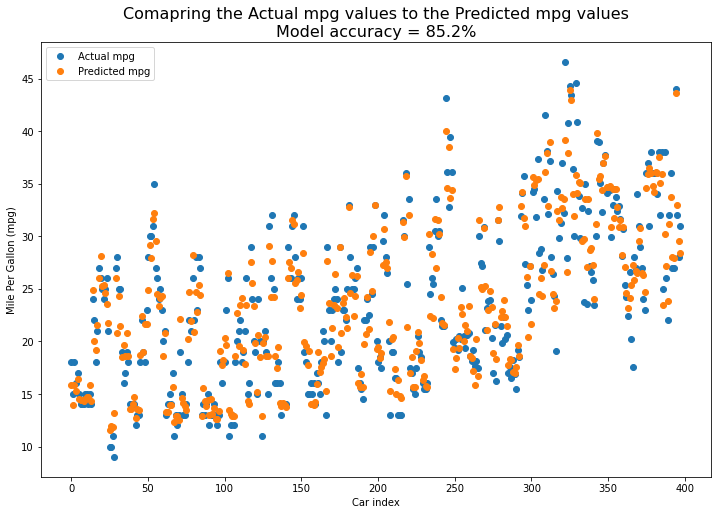

In [22]:
#visualization to check efficacy of predictions

features = new_df.drop('MPG', axis = 1) #features dataframe

data = pd.DataFrame({'MPG':new_df.MPG.values, 'Predicted MPG':gradient_search.predict(features.values)})

# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['MPG'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted MPG'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 85.2%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

In [23]:
# calculate the residuals 
data['Residuals'] = data['MPG']-data['Predicted MPG']
data

,MPG,Predicted MPG,Residuals
0,18.0,15.892952,2.107048
1,15.0,13.967362,1.032638
2,18.0,15.813299,2.186701
3,16.0,15.304495,0.695505
4,17.0,16.428899,0.571101
...,...,...,...
393,27.0,27.940557,-0.940557
394,44.0,43.619311,0.380689
395,32.0,32.978641,-0.978641
396,28.0,29.507174,-1.507174
